In [4]:
import torch
import matplotlib.pyplot as plt

torch.rand(3,5)

tensor([[0.6107, 0.3256, 0.3495, 0.4770, 0.1960],
        [0.3932, 0.2172, 0.0137, 0.0151, 0.6222],
        [0.6898, 0.5981, 0.5498, 0.5722, 0.8013]])

In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root="data",
    download=True,
    transform=ToTensor(),
    train=True
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
set(train_data.targets.numpy())

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

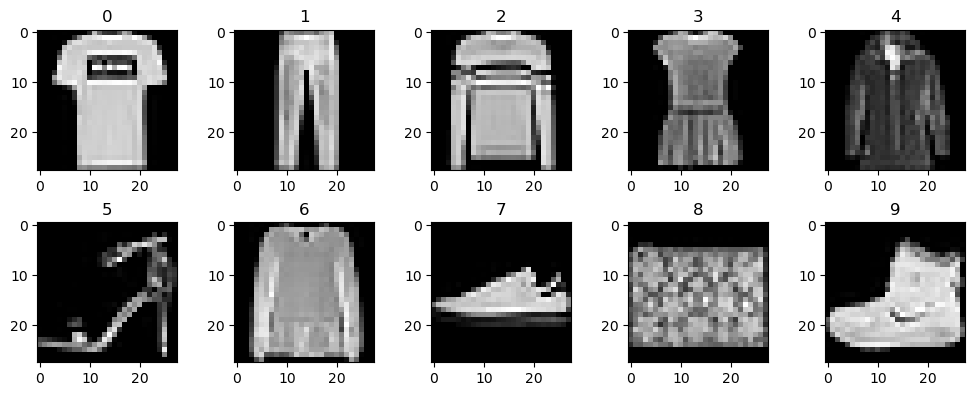

In [7]:
seen = set()
images = {}

for img, label in train_data:
    if label not in seen:
        images[label] = img
        seen.add(label)
    if len(seen) == 10:
        break

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(i)

plt.tight_layout()
plt.show()

In [47]:
from torch.utils.data import DataLoader 

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

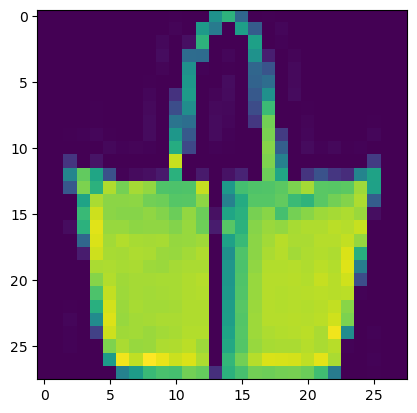

In [46]:
train_ft, train_lb = next(iter(train_dataloader))
train_ft.size()
img = train_ft[0].squeeze()
plt.imshow(img)

In [48]:
#One hot encoding of labels
from torchvision.transforms import ToTensor, Lambda
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform= Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter(dim=0, index=torch.tensor(y), value=1))
)

In [62]:
from torch import nn
imgDat, label = ds[0]
imFlat = nn.Flatten()
imgdat = imFlat(imgDat)
imgdat.size()

torch.Size([1, 784])

In [ ]:
#First doing a Linear stack layer

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(device)

cuda


In [63]:
class LinearLayers(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits


In [67]:
model = LinearLayers().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def trainer(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            lossItem, current = loss.item(), batch * 32 + len(X) # batch * batch size * len of each X which is around 28 * 28
            print(f"Loss: {loss:.2f} on {current} / {size}")


In [ ]:
def tester(dataloader, model, loss_fn):
    model.eval()

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.inference_mode():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        test_loss /= num_batches
        correct /= size

        print(f"Test error Accuracy {100*correct}, Avg Loss = {test_loss} \n")


In [71]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 10

for epoch in range(epochs):
    print(f"Epoch is {epoch} \n")

    trainer(train_dataloader, model, loss_fn, optimizer)
    tester(test_dataloader, model, loss_fn)

print("Done")


Epoch is 0 

Loss: 2.29 on 0 / 60000
Loss: 2.28 on 102400 / 60000
Loss: 2.29 on 204800 / 60000
Loss: 2.29 on 307200 / 60000
Loss: 2.28 on 409600 / 60000
Loss: 2.28 on 512000 / 60000
Loss: 2.29 on 614400 / 60000
Loss: 2.27 on 716800 / 60000
Loss: 2.28 on 819200 / 60000
Loss: 2.28 on 921600 / 60000
Loss: 2.26 on 1024000 / 60000
Loss: 2.26 on 1126400 / 60000
Loss: 2.28 on 1228800 / 60000
Loss: 2.26 on 1331200 / 60000
Loss: 2.25 on 1433600 / 60000
Loss: 2.23 on 1536000 / 60000
Loss: 2.24 on 1638400 / 60000
Loss: 2.22 on 1740800 / 60000
Loss: 2.21 on 1843200 / 60000
Test error Accuracy 38.04, Avg Loss = 2.216814937682959
Epoch is 1 

Loss: 2.21 on 0 / 60000
Loss: 2.25 on 102400 / 60000
Loss: 2.21 on 204800 / 60000
Loss: 2.20 on 307200 / 60000
Loss: 2.15 on 409600 / 60000
Loss: 2.18 on 512000 / 60000
Loss: 2.14 on 614400 / 60000
Loss: 2.18 on 716800 / 60000
Loss: 2.13 on 819200 / 60000
Loss: 2.07 on 921600 / 60000
Loss: 2.09 on 1024000 / 60000
Loss: 2.09 on 1126400 / 60000
Loss: 2.01 on 1228

In [85]:
train_sample, train_sample_label = next(iter(train_dataloader))
sample_label = train_sample_label[0].to(device)
sample_X = train_sample[0].to(device)

logit_y = model(sample_X)
pred_probY = nn.Softmax(dim=1)(logit_y)

sample_pred_y = pred_probY.argmax(1)

print(f"Predicted is {sample_pred_y.item()}, real is {sample_label}")

Predicted is 6, real is 6


In [86]:
#Saving
torch.save(model.state_dict(), 'linearStackImg.pth')

In [87]:
#Loading
model_copy = LinearLayers()
model_copy.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[-0.0298, -0.0217,  0.0336,  ..., -0.0137, -0.0255, -0.0265],
                      [-0.0130,  0.0012,  0.0109,  ...,  0.0211,  0.0278, -0.0096],
                      [-0.0219,  0.0188,  0.0084,  ...,  0.0291,  0.0138, -0.0322],
                      ...,
                      [ 0.0111,  0.0014, -0.0232,  ..., -0.0123, -0.0176, -0.0237],
                      [ 0.0019, -0.0180, -0.0062,  ..., -0.0234, -0.0238, -0.0306],
                      [ 0.0042,  0.0354,  0.0094,  ...,  0.0203,  0.0036,  0.0283]])),
             ('linear_stack.0.bias',
              tensor([ 2.4812e-02,  3.1025e-03, -3.3877e-02,  3.4586e-02,  1.2120e-02,
                       2.7469e-02, -1.5634e-02,  1.4329e-02,  1.7201e-02,  3.4889e-02,
                       1.3365e-02,  2.1483e-02,  1.9434e-03, -5.9753e-03,  9.4427e-03,
                      -2.4549e-02,  2.8646e-02,  3.1182e-02, -1.9238e-04, -1.8668e-02,
                       2.5609e-02, -3.1856

In [88]:
model_copy.load_state_dict(torch.load('linearStackImg.pth', weights_only=True))
model_copy.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[ 3.3078e-02,  1.6294e-02, -9.2774e-03,  ...,  1.3630e-02,
                       -3.8974e-03, -1.9011e-05],
                      [-3.8265e-03, -2.9292e-02, -2.8386e-02,  ...,  3.0833e-02,
                        1.0189e-03,  1.1091e-02],
                      [-2.1577e-02, -3.1325e-02, -3.7124e-03,  ...,  1.8921e-02,
                        1.0099e-02, -5.1165e-03],
                      ...,
                      [-7.7320e-03,  2.0078e-02,  2.2991e-02,  ..., -5.3926e-03,
                        4.5874e-03, -1.1699e-02],
                      [-1.7186e-02,  1.8120e-02,  3.4240e-02,  ...,  3.5291e-02,
                        1.5673e-02, -2.2375e-03],
                      [-2.5856e-03,  5.8761e-03, -2.3999e-02,  ...,  5.7163e-03,
                       -2.0041e-02,  5.3363e-04]])),
             ('linear_stack.0.bias',
              tensor([-2.6105e-02,  2.1661e-02, -9.5567e-03,  7.5519e-03,  3.5911e-02,
                     